In [2]:
class ModelParameters:
   # """
    #Encapsulates model parameters
    #"""

    def __init__(self,
                 all_s0, all_time, all_delta, all_sigma, gbm_mu,
                 jumps_lamda=0.0, jumps_sigma=0.0, jumps_mu=0.0,
                 cir_a=0.0, cir_mu=0.0, all_r0=0.0, cir_rho=0.0,
                 ou_a=0.0, ou_mu=0.0,
                 heston_a=0.0, heston_mu=0.0, heston_vol0=0.0):
        # This is the starting asset value
        self.all_s0 = all_s0
        # This is the amount of time to simulate for
        self.all_time = all_time
        # This is the delta, the rate of time e.g. 1/252 = daily, 1/12 = monthly
        self.all_delta = all_delta
        # This is the volatility of the stochastic processes
        self.all_sigma = all_sigma
        # This is the annual drift factor for geometric brownian motion
        self.gbm_mu = gbm_mu
        # This is the probability of a jump happening at each point in time
        self.lamda = jumps_lamda
        # This is the volatility of the jump size
        self.jumps_sigma = jumps_sigma
        # This is the average jump size
        self.jumps_mu = jumps_mu
        # This is the rate of mean reversion for Cox Ingersoll Ross
        self.cir_a = cir_a
        # This is the long run average interest rate for Cox Ingersoll Ross
        self.cir_mu = cir_mu
        # This is the starting interest rate value
        self.all_r0 = all_r0
        # This is the correlation between the wiener processes of the Heston model
        self.cir_rho = cir_rho
        # This is the rate of mean reversion for Ornstein Uhlenbeck
        self.ou_a = ou_a
        # This is the long run average interest rate for Ornstein Uhlenbeck
        self.ou_mu = ou_mu
        # This is the rate of mean reversion for volatility in the Heston model
        self.heston_a = heston_a
        # This is the long run average volatility for the Heston model
        self.heston_mu = heston_mu
        # This is the starting volatility value for the Heston model
        self.heston_vol0 = heston_vol0

In [3]:
def convert_to_returns(log_returns):
    #"""
    #This method exponentiates a sequence of log returns to get daily returns.
    #:param log_returns: the log returns to exponentiated
    #:return: the exponentiated returns
    #"""
    return numpy.exp(log_returns)


def convert_to_prices(param, log_returns):
    #"""
    #This method converts a sequence of log returns into normal returns (exponentiation) and then computes a price
    #sequence given a starting price, param.all_s0.
    #:param param: the model parameters object
    #:param log_returns: the log returns to exponentiated
    #:return:
    #"""
    returns = convert_to_returns(log_returns)
    # A sequence of prices starting with param.all_s0
    price_sequence = [param.all_s0]
    for i in range(1, len(returns)):
        # Add the price at t-1 * return at t
        price_sequence.append(price_sequence[i - 1] * returns[i - 1])
    return numpy.array(price_sequence)

In [4]:
def plot_stochastic_processes(processes, title):
    #"""
    #This method plots a list of stochastic processes with a specified title
    #:return: plots the graph of the two
    #"""
    plt.style.use(['bmh'])
    fig, ax = plt.subplots(1)
    fig.suptitle(title, fontsize=16)
    ax.set_xlabel('Time, t')
    ax.set_ylabel('Simulated Asset Price')
    x_axis = numpy.arange(0, len(processes[0]), 1)
    for i in range(len(processes)):
        plt.plot(x_axis, processes[i])
    plt.show()

In [5]:
#BROWNIAN MOTION STOCHASTIC PROCESS
#Brownian motion is the random motion exhibited by particles which have been suspended in a gas or liquid. This random motion is caused by the collision of the particles with the atoms or molecules in the liquid or gas. Brownian Motion is named after the Botanist Robert Brown who observed the random movements in 1827. The relationship between Brownian Motion and financial markets dates back to a paper written many years later, in 1900, by Louis Bachelier entitled The Theory of Speculation. His paper was the first to propose the use of Brownian Motion to evaluate stock options. The paper did not surface until later works in deriving the famous Black Scholes options pricing formula developed by Fisher Black and Myron Scholes in 1973. In the context of stochastic processes used in finance, Brownian Motion is often described as a Wiener process, denoted by Wt. A Wiener process is described by the following properties,

#W0=0
#The function t→Wt is continuous
#Wt has independent normally distributed increments i.e. Wt−Ws ~ N(0,t−s)
#In practice Brownian Motion is not used to model asset prices. I have included it because it is the foundation of every other stochastic process discussed in this article.



In [6]:
# mistakes in the codes, see mine
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def brownian_motion_log_returns(param):
 #   """
  #  This method returns a Wiener process. The Wiener process is also called Brownian motion. For more information
   # about the Wiener process check out the Wikipedia page: http://en.wikipedia.org/wiki/Wiener_process
    #:param param: the model parameters object
    #:return: brownian motion log returns
    #"""
    sqrt_delta_sigma = math.sqrt(param.all_delta) * param.all_sigma
    return nrand.normal(loc=0, scale=sqrt_delta_sigma, size=param.all_time)


def brownian_motion_levels(param):
    #"""
    #Returns a price sequence whose returns evolve according to a brownian motion
    #:param param: model parameters object
    #:return: returns a price sequence which follows a brownian motion
    #"""
    return convert_to_prices(param, brownian_motion_log_returns(param))

In [7]:
#THE ORNSTEIN–UHLENBECK STOCHASTIC PROCESS
#The Ornstein Uhlebneck stochastic process is another mean-reverting process which is sometimes used for modelling interest rates. The Ornstein Uhlenbeck process is named after Leonard Ornstein and George Eugene Uhlenbeck. The difference between the Ornstein Uhlenbeck stochastic process and the CIR process is that the CIR processes multiplies the stochastic component by the square root of the previous value for the interest rate. The stochastic differential equation for the Ornstein Uhlenbeck process is,

#drt=a(b−rt)dt+σdWt # rt can be replaced by xt, b is the mean miu and sigma is the diffusion coefficient(not sure though)

#where Wt is a Wiener process, a is the rate at which the process mean reverts (a larger number results in a faster mean reverting process), b is the long run average interest rate, and σ is the volatility of the process. The code for the Ornstein Uhlenbeck stochastic process is given below.

In [8]:
# OU process
import math
import numpy
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

#"""
#Note that this Gist uses the Model Parameters class found here  - https://gist.github.com/StuartGordonReid/f01f479c783dd40cc21e
#"""

def ornstein_uhlenbeck_levels(param):
    #"""
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    #:param param: the model parameters object
    #:return: the interest rate levels for the Ornstein Uhlenbeck process
    #"""
    ou_levels = [param.all_r0]
    brownian_motion_returns = brownian_motion_log_returns(param)
    for i in range(1, param.all_time):
        drift = param.ou_a * (param.ou_mu - ou_levels[i-1]) * param.all_delta
        randomness = brownian_motion_returns[i - 1]
        ou_levels.append(ou_levels[i - 1] + drift + randomness)
    return ou_levels

In [9]:
# putting everything together
import math
import numpy as np
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt

def brownian_motion_log_returns(param_all_delta,param_all_sigma,param_all_time):
    #  This method returns a Wiener process
    sqrt_delta_sigma = math.sqrt(param_all_delta) * param_all_sigma
    return sqrt_delta_sigma*np.random.normal(0,1)

#define now the hyperparameters for the two functions

def ornstein_uhlenbeck_levels(param_all_r0,param_ou_a,param_ou_mu):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    ou_levels = np.zeros(len(param_all_time))#[param_all_r0]
    brownian_motion_returns = brownian_motion_log_returns(param_all_delta,param_all_sigma,param_all_time)
    for i in range(1, len(param_all_time)):
        drift = param_ou_a * (param_ou_mu - ou_levels[i-1]) * param_all_delta
        randomness = brownian_motion_returns
        ou_levels[i]=ou_levels[i - 1] + drift + randomness
    return ou_levels

In [10]:
dt=0.02
param_all_time=np.arange(0,2,dt)# time
param_all_r0=np.zeros(len(param_all_time))# initial values
param_all_sigma=0.3
param_all_delta=dt
param_ou_a=1# the coefficient in front, the rate
param_ou_mu=1.2# the mean

In [11]:
# Simulation of OU process
ornstein_uhlenbeck_levels(param_all_r0,param_ou_a,param_ou_mu)# the first one is zero because param_all_r0 starts at 0


array([0.        , 0.03918588, 0.07758805, 0.11522217, 0.1521036 ,
       0.18824741, 0.22366835, 0.25838086, 0.29239912, 0.32573702,
       0.35840816, 0.39042588, 0.42180325, 0.45255306, 0.48268788,
       0.51222001, 0.54116149, 0.56952414, 0.59731954, 0.62455903,
       0.65125373, 0.67741454, 0.70305213, 0.72817697, 0.75279931,
       0.7769292 , 0.8005765 , 0.82375085, 0.84646172, 0.86871836,
       0.89052988, 0.91190516, 0.93285294, 0.95338176, 0.97350001,
       0.99321589, 1.01253745, 1.03147259, 1.05002902, 1.06821432,
       1.08603591, 1.10350107, 1.12061693, 1.13739048, 1.15382855,
       1.16993786, 1.18572498, 1.20119637, 1.21635832, 1.23121703,
       1.24577858, 1.26004889, 1.27403379, 1.28773899, 1.3011701 ,
       1.31433258, 1.32723181, 1.33987305, 1.35226147, 1.36440212,
       1.37629996, 1.38795984, 1.39938653, 1.41058468, 1.42155887,
       1.43231357, 1.44285318, 1.453182  , 1.46330424, 1.47322404,
       1.48294544, 1.49247241, 1.50180884, 1.51095855, 1.51992

In [12]:
brownian_motion_log_returns(param_all_delta,param_all_sigma,param_all_time)

-0.009675027106805057

In [13]:
#1. Simulating the Ornstein–Uhlenbeck process

#You should first be familiar with how to simulate this process using the Euler–Maruyama method. The stochastic differential equation (SDE)

#dxt=θ(μ−xt)dt+σdWt
#can be discretized and approximated via

#Xn+1=Xn+θ(μ−Xn)Δt+σΔWn
#where ΔWn are independent identically distributed Wiener increments, i.e., normal variates with zero mean and variance Δt. Thus, Wtn+1−Wtn=ΔWn∼N(0,Δt)=Δt−−−√ N(0,1). This can be simulated in Matlab very easily using randn to generate standard normal variates:


#another way of simulating an OU process; MATLAB CODE
#th = 1;
#mu = 1.2;
#sig = 0.3;
#dt = 1e-2;
#t = 0:dt:2;             % Time vector
#x = zeros(1,length(t)); % Allocate output vector, set initial condition
#rng(1);                 % Set random seed
#for i = 1:length(t)-1
 #   x(i+1) = x(i)+th*(mu-x(i))*dt+sig*sqrt(dt)*randn;
#end
#figure;
#plot(t,x);

In [14]:
#Simulation of an OU process
training_data=ornstein_uhlenbeck_levels(param_all_r0,param_ou_a,param_ou_mu)# the first one is zero because param_all_r0 starts at 0
t=param_all_time# time vector
x=training_data

In [15]:
training_data

array([0.        , 0.04376407, 0.08665286, 0.12868388, 0.16987427,
       0.21024086, 0.24980012, 0.28856819, 0.32656089, 0.36379375,
       0.40028195, 0.43604038, 0.47108364, 0.50542604, 0.53908159,
       0.57206403, 0.60438683, 0.63606316, 0.66710597, 0.69752792,
       0.72734144, 0.75655868, 0.78519158, 0.81325182, 0.84075086,
       0.86769991, 0.89410999, 0.91999186, 0.94535609, 0.97021304,
       0.99457286, 1.01844547, 1.04184063, 1.06476789, 1.08723661,
       1.10925595, 1.1308349 , 1.15198228, 1.1727067 , 1.19301664,
       1.21292038, 1.23242605, 1.2515416 , 1.27027484, 1.28863341,
       1.30662482, 1.32425639, 1.34153534, 1.3584687 , 1.3750634 ,
       1.39132621, 1.40726375, 1.42288255, 1.43818897, 1.45318926,
       1.46788955, 1.48229583, 1.49641399, 1.51024978, 1.52380886,
       1.53709675, 1.55011889, 1.56288059, 1.57538705, 1.58764338,
       1.59965458, 1.61142556, 1.62296112, 1.63426597, 1.64534473,
       1.6562019 , 1.66684194, 1.67726917, 1.68748786, 1.69750

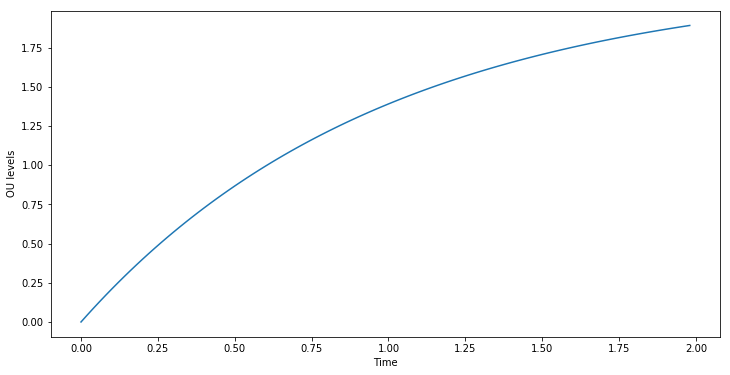

In [22]:
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU levels')
plt.show()

In [17]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Anaconda\lib\site-packages\multipledispatch\dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Linear, NoneType, Sum, InducingPoints], [Gaussian, Identity, NoneType, Kernel, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [18]:
# Setting everything to column vectors
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)

In [19]:
k = gpflow.kernels.Matern12(1,lengthscales=0.3)
m = gpflow.models.GPR(t_column,x_column,kern=k)
m.likelihood.variance = 0.01

In [20]:
#They have everything as column vectors
#N = 12
#X = np.random.rand(N,1)
#Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
#plt.plot(X, Y, 'kx', mew=2)

Text(0,0.5,'OU level')

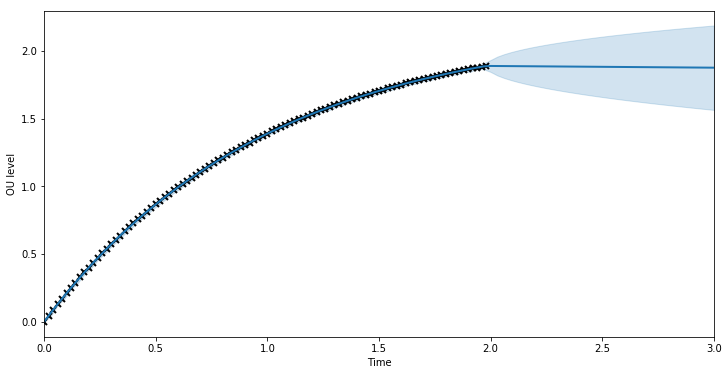

In [28]:
def plot(m):
    tt = np.linspace(0, 3, 100).reshape(100, 1)
    mean, var = m.predict_y(tt)
    plt.figure(figsize=(12, 6))
    plt.plot(t_column,x_column, 'kx', mew=2)
    plt.plot(tt, mean, 'C0', lw=2)
    plt.fill_between(tt[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(0, 3)
    
plot(m)
plt.xlabel('Time')
plt.ylabel('OU level')

In [24]:
m.as_pandas_table()


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.0
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,0.3
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,0.01


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: -235.923954
  Number of iterations: 0
  Number of functions evaluations: 1


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: -235.923954
  Number of iterations: 0
  Number of functions evaluations: 1


,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/variance,Parameter,None,+ve,True,(),True,1.7904049295887265
GPR/kern/lengthscales,Parameter,None,+ve,True,(),True,148.72461835284744
GPR/likelihood/variance,Parameter,None,+ve,True,(),True,1.0000000002220446e-06


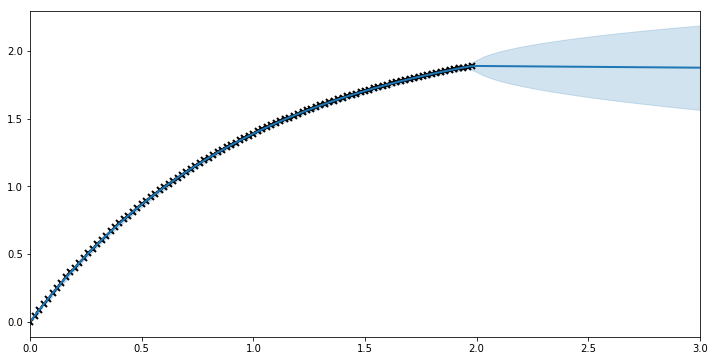

In [29]:
gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
m.as_pandas_table()